In [1]:
from os import listdir, walk
from os.path import isfile, join
import pandas as pd
import datetime

In [2]:
path = "files/"
coins = ['btc'] #, 'audchf/']

In [3]:
for coin in coins:
    files = [f for f in listdir(path) if f.startswith(coin) and '0' not in f]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'files/'

In [4]:
files

NameError: name 'files' is not defined

In [6]:
import datetime
def convert_to_time(t):
    t /= 1000
    seconds = int(t%60)
    t /= 60
    minutes = int(t%60)
    t /= 60
    hours = int(t%24)
    return datetime.time(hours, minutes, seconds)

In [7]:
import matplotlib.pyplot as plt
temp = pd.read_csv(path+files[0])
temp['time'] = temp['time'].apply(lambda x: datetime.date.fromtimestamp(x/1000))
plt.plot(temp['time'], temp['close'])
plt.xticks(rotation = 45)

(array([17652., 17775., 17897., 18017., 18140., 18262., 18383., 18506.,
        18628., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [21]:

df = temp.copy()
opens = df['open'].values
highs = df['high'].values
lows = df['low'].values
closes = df['close'].values
# Add indicator columns to DataFrame
for indicator_name, indicator_values in INDICATORS.items():
    if indicator_name == 'BBANDS':
        ub, _, lb = getattr(talib, indicator_values['method'])(closes, indicator_values['period'])
        df[f'{indicator_name}_UB'], df[f'{indicator_name}_LB'] = ub, lb
    elif indicator_name == 'ATR':
        df[indicator_name] = \
            getattr(talib, indicator_values['method'])(highs,
                                                       lows,
                                                       closes,
                                                       indicator_values['period'])
    else:
        df[indicator_name] = getattr(talib, indicator_values['method'])(closes,
                                                                         indicator_values['period'])

In [1]:
pip install talib==0.4.17

Note: you may need to restart the kernel to use updated packages.


'c:\program' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import talib

INDICATORS = {
    'BBANDS': {'method': 'BBANDS', 'period': 20}, 'SMA_SLOW': {'method': 'SMA', 'period': 200},
    'SMA_FAST': {'method': 'SMA', 'period': 50}, 'EMA_SLOW': {'method': 'EMA', 'period': 20},
    'EMA_FAST': {'method': 'EMA', 'period': 9}, 'ATR': {'method': 'ATR', 'period': 14},
    'RSI': {'method': 'RSI', 'period': 14}
}

def get_indicators(df):
    df = df.copy()
    opens = df['open'].values
    highs = df['high'].values
    lows = df['low'].values
    closes = df['close'].values
    # Add indicator columns to DataFrame
    for indicator_name, indicator_values in INDICATORS.items():
        if indicator_name == 'BBANDS':
            ub, _, lb = getattr(talib, indicator_values['method'])(closes, indicator_values['period'])
            df[f'{indicator_name}_UB'], df[f'{indicator_name}_LB'] = ub, lb
        elif indicator_name == 'ATR':
            df[indicator_name] = \
                getattr(talib, indicator_values['method'])(highs,
                                                           lows,
                                                           closes,
                                                           indicator_values['period'])
        else:
            df[indicator_name] = getattr(talib, indicator_values['method'])(closes,
                                                                             indicator_values['period'])
    return df

In [33]:
train = pd.DataFrame()
test = pd.DataFrame()
for i, f in enumerate(files):
    print(i)
    temp = pd.read_csv(path+f)
    if temp.shape[0] == 0:
        continue
    temp['datetime'] = temp['time'].apply(lambda x: datetime.date.fromtimestamp(x/1000))
    temp['time'] = temp['time'].apply(convert_to_time)
    temp['symbol'] = f
    temp = get_indicators(temp)
    
    symbol = f.split('.')[0]
    test = pd.concat([test, temp[[t.year == 2021 for t in temp['datetime']]]])
    train = pd.concat([train, temp[[t.year != 2021 for t in temp['datetime']]]])

0
1
2
3
4
5
6


In [34]:
del train['Unnamed: 0']
del test['Unnamed: 0']
train.dropna(inplace=True)
test.dropna(inplace=True)

In [19]:
train.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)

In [35]:
len(train), len(test)

(5562450, 935322)

In [36]:
train

,time,open,close,high,low,volume,datetime,symbol,BBANDS_UB,BBANDS_LB,SMA_SLOW,SMA_FAST,EMA_SLOW,EMA_FAST,ATR,RSI
199,09:28:00,753510.000000,753510.000000,753510.000000,753510.000000,1.578692,2018-03-30,btcjpy.csv,771735.515520,742337.743943,746667.267598,741537.916692,755822.348291,757044.519428,3748.488696,49.929139
200,09:29:00,753510.000000,753510.000000,753510.000000,753510.000000,0.421308,2018-03-30,btcjpy.csv,770511.858639,744820.358042,746499.727271,742504.881062,755602.124644,756337.615542,3480.739504,49.929139
201,10:25:00,748170.000000,748170.000000,748170.000000,748170.000000,13.859833,2018-03-30,btcjpy.csv,770315.231421,745189.801259,746258.017296,743370.787793,754894.303249,754704.092434,3613.543825,44.618720
202,10:51:00,735485.010870,735485.010870,735485.010870,735485.010870,0.016886,2018-03-30,btcjpy.csv,772515.869172,741717.220126,745951.623738,743924.488010,753045.799213,750860.276121,4261.504204,35.075203
203,10:54:00,736663.009459,736663.009459,736663.009459,736663.009459,0.003697,2018-03-30,btcjpy.csv,773993.449374,739012.231508,745661.013234,744485.816932,751485.533522,748020.822789,4041.253803,36.434922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101024,23:55:00,23774.278465,23779.203565,23781.000000,23774.278465,0.086300,2020-12-31,btceur.csv,23798.573715,23661.521995,23736.905694,23748.034105,23744.370847,23759.702674,23.611188,58.891308
1101025,23:56:00,23780.000000,23779.203565,23780.000000,23779.000000,0.100137,2020-12-31,btceur.csv,23804.610210,23661.605856,23737.386712,23746.798176,23747.688249,23763.602852,21.996103,58.891308
1101026,23:57:00,23780.000000,23778.000000,23780.000000,23771.000000,4.927400,2020-12-31,btceur.csv,23809.792706,23661.989801,23737.881712,23745.918241,23750.575082,23766.482282,21.067810,58.519341
1101027,23:58:00,23778.382715,23738.981915,23778.382715,23738.981915,1.376886,2020-12-31,btceur.csv,23809.499483,23666.781216,23738.226621,23745.137880,23749.470971,23760.982208,22.377309,47.946520


In [38]:
train['symbol'].value_counts()

btcusd.csv    3146582
btceur.csv    1100830
btcjpy.csv     498625
btcgbp.csv     437446
btcust.csv     376916
btcxch.csv       2051
Name: symbol, dtype: int64

In [22]:
def cumsample(x):
    if x.shape[0] == 0:
        return pd.DataFrame()
    else:
        return pd.DataFrame({'open': [x['open_1min'].iloc[0]]*len(x), 'close': x['close_1min'], 'close_bid': x['close_bid_1min'], 'high': x['close_1min'].cummax(), 'low': x['close_1min'].cummin()})

In [53]:
%%time
timeframes = ['5min', '15min', '30min', '60min']
dfs = pd.DataFrame()
for frame in timeframes:
    print(frame)
    df = train.resample(frame).apply(cumsample)
    df.index = df.index.droplevel()
    df.columns = [c+'_'+frame for c in df.columns]
    dfs = pd.concat([dfs, df], axis=1)
train = pd.concat([train, dfs], axis=1)

5min
15min
30min
60min
Wall time: 39min 54s


In [54]:
%%time
timeframes = ['5min', '15min', '30min', '60min']
dfs = pd.DataFrame()
for frame in timeframes:
    print(frame)
    df = test.resample(frame).apply(cumsample)
    df.index = df.index.droplevel()
    df.columns = [c+'_'+frame for c in df.columns]
    dfs = pd.concat([dfs, df], axis=1)
test = pd.concat([test, dfs], axis=1)

5min
15min
30min
60min
Wall time: 41.3 s


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317435 entries, 2016-01-04 12:01:00+00:00 to 2020-12-30 19:59:00+00:00
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             317435 non-null  object 
 1   date             317435 non-null  object 
 2   spread           317435 non-null  float64
 3   close_bid_1min   317435 non-null  float64
 4   open_1min        317435 non-null  float64
 5   high_1min        317435 non-null  float64
 6   low_1min         317435 non-null  float64
 7   close_1min       317435 non-null  float64
 8   open_5min        317435 non-null  float64
 9   close_5min       317435 non-null  float64
 10  close_bid_5min   317435 non-null  float64
 11  high_5min        317435 non-null  float64
 12  low_5min         317435 non-null  float64
 13  open_15min       317435 non-null  float64
 14  close_15min      317435 non-null  float64
 15  close_bid_15min  317435 non-null  float

In [71]:
train.mean()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-71-b2f34c448aca>", line 1, in <module>
    train.mean()
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py", line 11113, in mean
    return NDFrame.mean(self, axis, skipna, level, numeric_only, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py", line 10722, in mean
    "mean", nanops.nanmean, axis, skipna, level, numeric_only, **kwargs
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py", line 10707, in _stat_function
    func, name=name, axis=axis, skipna=skipna, numeric_only=numeric_only
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\pandas\co

TypeError: object of type 'NoneType' has no len()

In [39]:
l = ['time', 'datetime', 'symbol']
train.columns = [c if c in l else c+'_1min' for c in train.columns]
test.columns = [c if c in l else c+'_1min' for c in test.columns]

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5562450 entries, 199 to 1101028
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            object 
 1   open_1min       float64
 2   close_1min      float64
 3   high_1min       float64
 4   low_1min        float64
 5   volume_1min     float64
 6   datetime        object 
 7   symbol          object 
 8   BBANDS_UB_1min  float64
 9   BBANDS_LB_1min  float64
 10  SMA_SLOW_1min   float64
 11  SMA_FAST_1min   float64
 12  EMA_SLOW_1min   float64
 13  EMA_FAST_1min   float64
 14  ATR_1min        float64
 15  RSI_1min        float64
dtypes: float64(13), object(3)
memory usage: 721.4+ MB


In [41]:
train.to_csv('train_crypt.csv', index=False)
test.to_csv('test_crypt.csv', index=False)

In [7]:
train = pd.read_csv('train_timeframes2.csv')
test = pd.read_csv('test_timeframes2.csv')

In [65]:
import numpy as np
def normalize(data, window, step):
    result = []
    for frame in ['_1min', '_5min', '_15min', '_30min', '_60min']:
        values = [c for c in data.columns if frame in c]
        ohlc = data.iloc[step - window + 1:step + 1][values].copy()

        min_low = ohlc[values].min().min()
        for c in ohlc.columns:
            ohlc[c] -= min_low

        max_high = ohlc[values].max().max()
        for c in ohlc.columns:
            ohlc[c] /= max_high
        
        result.append(ohlc.values)
        
    return np.array(result)

In [66]:
window_size = 120

In [67]:
%%time
inputs_train = []
for i in range(window_size-1, len(train)):
    if i % 1000 == 0:
        print(i)
    inputs_train.append(normalize(train, window_size , i))
inputs_train = np.array(inputs_train)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [68]:
%%time
inputs_test = []
for i in range(window_size-1, len(test)):
    if i % 1000 == 0:
        print(i)
    inputs_test.append(normalize(test, window_size , i))
inputs_test = np.array(inputs_test)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
Wall time: 47min 40s


In [69]:
inputs_train.shape, inputs_test.shape

((317316, 5, 120, 5), (24305, 5, 120, 5))

In [70]:
np.save("inputs_train_120", inputs_train)
np.save("inputs_test_120", inputs_test)

<AxesSubplot:>

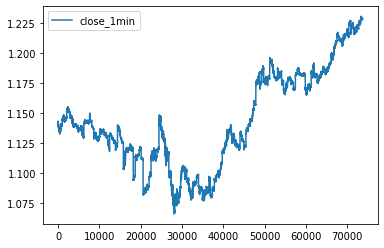

In [32]:
train.plot(y='close_1min')

In [72]:
inputs_train = np.transpose(inputs_train, (0, 2,3,1))
inputs_test = np.transpose(inputs_test, (0, 2,3,1))

In [ ]:
inputs_train = inputs_train.reshape(inputs_train.shape[:2] + (inputs_train.shape[2]*inputs_train.shape[3],))
inputs_test = inputs_test.reshape(inputs_test.shape[:2] + (inputs_test.shape[2]*inputs_test.shape[3],))

In [ ]:
all_closes_train = tf.convert_to_tensor([[train.iloc[i+j:i+j+time_limit]['close_1min'].tolist() for j in range(batch_size)] for i in range(len(train)-buffer)])
all_closes_test = tf.convert_to_tensor([[df[1].iloc[i+j:i+j+time_limit]['close_1min'].tolist() for j in range(batch_size)] for i in range(len(df[1])-buffer)])